# Нейроинформатика. Лабораторная работа 1
### Персептроны. Процедура обучения Розенблатта

Целью работы является исследование свойств персептрона Розенблатта и его применение для решения задачи распознавания образов.

Выполнил Моисеенков Илья, 408Б

In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

Датасеты:

In [2]:
def get_dataset(task):
    if task != 1 and task != 2:
        return None, None
    if task == 1:
        data = np.array([[-2.8, 1.4], [-0.2, -3.5], [2.8, -4], [-2.1, -2.7], [0.3, -4.1], [-1, -4]])
        labels = np.array([0, 1, 1, 0, 1, 0])
    elif task == 2:
        data = np.array([[1.7, 3.3], [4.7, -4.5], [-0.5, 0.8], [1.8, 2.1], [1.5, 2.2], [-1.3, 0.8], [-3.9, -4.5], [4.7, -2.2]])
        labels = np.array([[1, 1], [0, 1], [1, 0], [1, 1], [1, 1], [1, 0], [0, 0], [0, 1]])
    assert data.shape[0] == labels.shape[0]
    return data, labels

### Задание 1

In [3]:
data1, labels1 = get_dataset(1)
data1, labels1

(array([[-2.8,  1.4],
        [-0.2, -3.5],
        [ 2.8, -4. ],
        [-2.1, -2.7],
        [ 0.3, -4.1],
        [-1. , -4. ]]), array([0, 1, 1, 0, 1, 0]))

In [4]:
data1.shape, labels1.shape

((6, 2), (6,))

Обучим перцептрон для классификации точек

In [90]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(1, activation='sigmoid'))

В качестве лосса я решил использовать бинарную кросс-энтропию (что более привычно для задач классификации).

In [91]:
model1.compile(loss='bce', optimizer='adam')

In [92]:
train_info1 = model1.fit(data1, labels1, batch_size=1, epochs=500)

Epoch 1/500
6/6 [==============================] - 0s 3ms/step - loss: 0.7170
Epoch 2/500
6/6 [==============================] - 0s 4ms/step - loss: 0.7094
Epoch 3/500
6/6 [==============================] - 0s 3ms/step - loss: 0.7029
Epoch 4/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6947
Epoch 5/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6889
Epoch 6/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6814
Epoch 7/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6738
Epoch 8/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6689
Epoch 9/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6610
Epoch 10/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6548
Epoch 11/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6493
Epoch 12/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6435
Epoch 13/500
6/6 [==============================] - 0s 3ms/st

Посмотрим на график лосса

In [93]:
def plot_loss(train_info):
    plt.figure(figsize=(6, 6))
    loss_history = train_info.history['loss']
    plt.plot(range(1, len(loss_history) + 1), loss_history)
    plt.grid()
    plt.show()

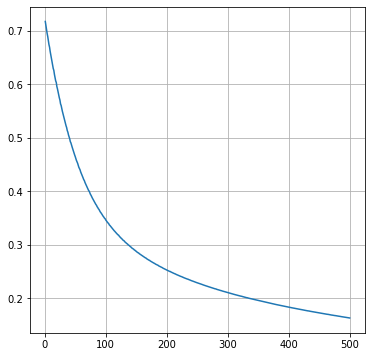

In [94]:
plot_loss(train_info1)

Лосс падает, перцептрон учится.

Построим разделяющую линию для двумерного случая.

Мы знаем, что однослойный перцептрон - линейный слой, поэтому разделяющая линия будет прямой. Любую прямую можно задать уравнением:

$$ax + by + c = 0$$

С математической точки зрения перцептрон - это функция вида

$$perceptron(v) = vA + b$$
где $v = (x, y)$, $A = (a_0, a_1)^T$

Записывая в скалярном виде:
$$perceptron(x, y) = a_0x + a_1y + b$$

Если значение этой функции больше нуля (сигмоида от результата больше 0.5), то относим точку $(x, y)$ к первому классу, иначе ко второму. Следовательно, искомая разделяющая прямая имеет вид
$$a_0x + a_1y + b = 0$$

Коэффициенты $a_i, b$ нам известны.

Для построения прямой возьмем несколько значений $x$, для каждого из них найдем $y = \frac{(-a_0x - b)}{a_1}$

In [135]:
def plot_result(data, labels, model, show_result=True):
    plt.figure(figsize=(15,7))

    plt.scatter(data[:, 0], data[:, 1], c=labels)

    A, b = model.layers[0].get_weights()

    x_disc = np.linspace(-5, 5, 5)
    plt.plot(x_disc, (-A[0] * x_disc - b) / A[1])

    plt.grid()
    if show_result:
        plt.show()

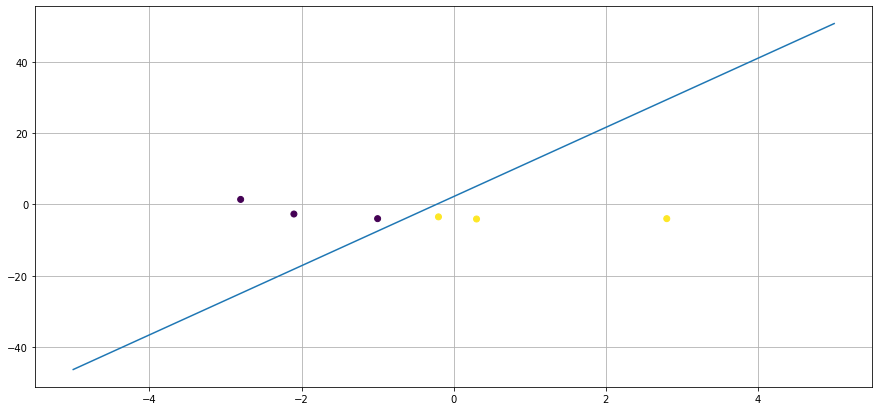

In [136]:
plot_result(data1, labels1, model1)

Проверка качества перцептрона.

Сгенерим несколько рандомных точек (на графике они будут большего размера). Получим предсказания модели и отметим предсказания соответствующим цветом на картинке

In [143]:
def check_model(data, labels, model, n=5, threshold=0.5):
    plot_result(data, labels, model, show_result=False) # train data and line

    test_data = np.random.uniform(-5, 5, (n, 2))
    test_labels = model.predict(test_data) > threshold
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100)
    plt.show()

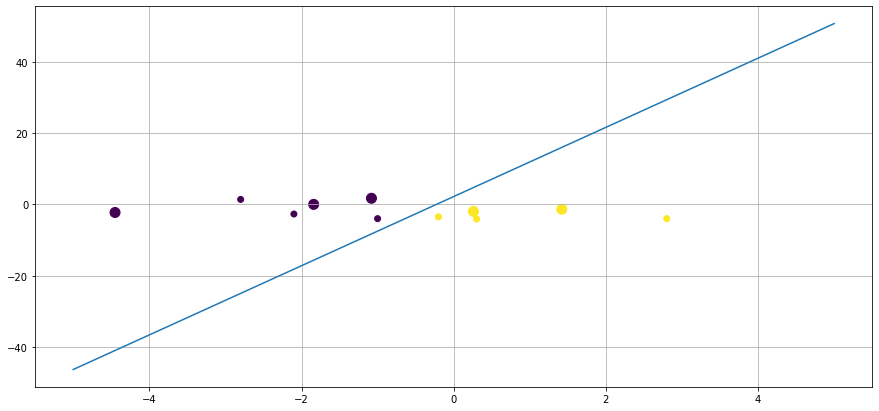

In [144]:
check_model(data1, labels1, model1)

Видим, что перцептрон определил классы без ошибок

### Задание 2

In [145]:
data2, labels2 = get_dataset(2)
data2, labels2

(array([[ 1.7,  3.3],
        [ 4.7, -4.5],
        [-0.5,  0.8],
        [ 1.8,  2.1],
        [ 1.5,  2.2],
        [-1.3,  0.8],
        [-3.9, -4.5],
        [ 4.7, -2.2]]), array([[1, 1],
        [0, 1],
        [1, 0],
        [1, 1],
        [1, 1],
        [1, 0],
        [0, 0],
        [0, 1]]))

In [146]:
data2.shape, labels2.shape

((8, 2), (8, 2))

In [147]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(2, activation='sigmoid'))

In [149]:
model2.compile(loss='bce', optimizer='adam')

In [150]:
train_info2 = model2.fit(data2, labels2, batch_size=1, epochs=500)

Epoch 1/500
8/8 [==============================] - 0s 3ms/step - loss: 3.3881
Epoch 2/500
8/8 [==============================] - 0s 3ms/step - loss: 3.3684
Epoch 3/500
8/8 [==============================] - 0s 6ms/step - loss: 3.3527
Epoch 4/500
8/8 [==============================] - 0s 3ms/step - loss: 3.3339
Epoch 5/500
8/8 [==============================] - 0s 3ms/step - loss: 3.3172
Epoch 6/500
8/8 [==============================] - 0s 3ms/step - loss: 3.2991
Epoch 7/500
8/8 [==============================] - 0s 4ms/step - loss: 3.2820
Epoch 8/500
8/8 [==============================] - 0s 3ms/step - loss: 3.2656
Epoch 9/500
8/8 [==============================] - 0s 2ms/step - loss: 3.2473
Epoch 10/500
8/8 [==============================] - 0s 3ms/step - loss: 3.2308
Epoch 11/500
8/8 [==============================] - 0s 3ms/step - loss: 3.2131
Epoch 12/500
8/8 [==============================] - 0s 2ms/step - loss: 3.1967
Epoch 13/500
8/8 [==============================] - 0s 2ms/st

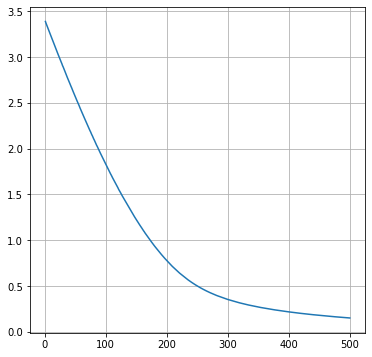

In [152]:
plot_loss(train_info2)

Сейчас мы классифицируем уже на 4 класса, поэтому разделяющих прямых будет две.

Перцептрон в текущем задании эквивалентен формуле:
$$perceptron(x, y) = (x~~ y)
\begin{pmatrix}
  a_{00}& a_{01}\\
  a_{10}& a_{11}
\end{pmatrix} +
\begin{pmatrix}
  b_0\\
  b_1
\end{pmatrix} =
\begin{pmatrix}
  a_{00}x+a_{10}y + b_0\\
  a_{01}x+a_{11}y + b_1
\end{pmatrix}$$

Построив две разделяющие прямые, мы разобьем координатную плоскость на 4 сектора-класса

Модифицируем функцию:

In [179]:
def plot_result_4classes(data, labels, model, show_result=True):
    plt.figure(figsize=(15,7))

    plt.scatter(data[:, 0], data[:, 1], c=[int(str(i*10 + j), 2) for i, j in labels])

    A, b = model.layers[0].get_weights()

    x_disc = np.linspace(-5, 5, 5)
    plt.plot(x_disc, (-A[0][0] * x_disc - b[0]) / A[1][0])
    plt.plot(x_disc, (-A[0][1] * x_disc - b[1]) / A[1][1])

    plt.grid()
    if show_result:
        plt.show()

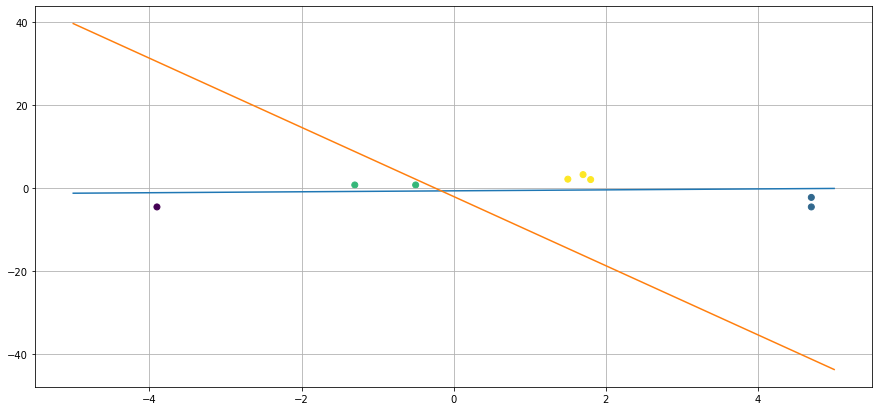

In [180]:
plot_result_4classes(data2, labels2, model2)

Тестируем перцептрон.

In [182]:
def check_model_4classes(data, labels, model, n=5, threshold=0.5):
    plot_result_4classes(data, labels, model, show_result=False) # train data and line

    test_data = np.random.uniform(-5, 5, (n, 2))
    test_labels = model.predict(test_data) > threshold

    plt.scatter(test_data[:, 0], test_data[:, 1],
                c=[int(str(i*10 + j), 2) for i, j in test_labels], s=100)
    plt.show()

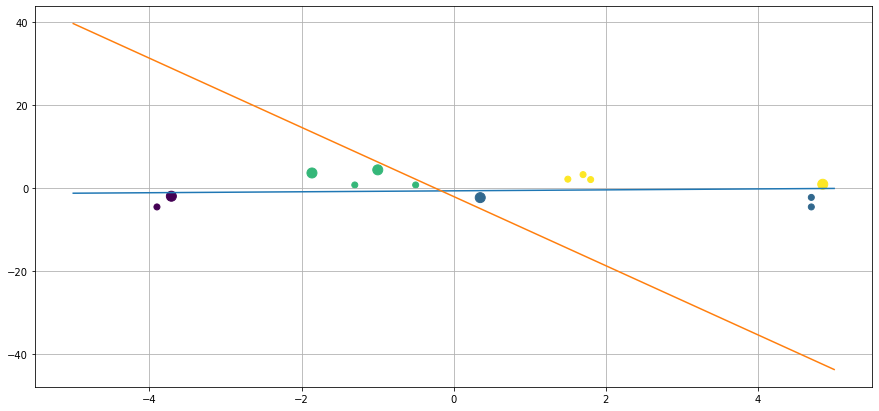

In [183]:
check_model_4classes(data2, labels2, model2)

Видим, что перцептрон неплохо справляется с классификацией тестовых точек

# Вывод

В данной работе я освежил свои знания по перцетрону. Я решил задачу классификации на 2 и 4 класса с помощью однослойной нейросети. Обученный перцептрон довольно неплохо справляется со своей задачей - в этом мы убедились, проверив его на новых рандомно сгенерированных точках.

Немного непривычно было видеть двумерные лейблы в задаче классификации на 4 класса. Чтобы было удобнее определять цвета точек в матплотлибе, пришлось переводить эти лейблы в более привычный вид (0, 1, 2, 3).

Стоит отметить, что мы не можем гарантировать стопроцентное качество обученных моделей. При обучении использовалось очень мало данных. Поэтому иногда полученные модели могут ошибаться (особенно на точках вблизи разделяющих линий)